Name: Abdul Zakir Sayed

PSID: 2145021

EDS 6342 -- bonus project

Create a model to predict tumor being benign/malignant based on the historical medical data 

The original dataset is on UCI Machine Learning Repository and Kaggle
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute information

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


### Import libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

### Getting started

In [2]:
#Load data

df = pd.read_csv("wdbc.data", names=["id number","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal dimension_mean","radius_SE","texture_SE","perimeter_SE","area_SE","smoothness_SE","compactness_SE","concavity_SE","concave points_SE","symmetry_SE","fractal dimension_SE","radius_worst","texture_worst","perimeter_worst","area_Sworst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal dimension_worst"])
df.head()

,id number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_Sworst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Exploring Diagnosis column

print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize = True))

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


So we have 569 instances out of which we have B-357 and M-212

In [4]:
# Basic statistics

df.describe()

,id number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_Sworst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Removing the id column

df.drop(['id number'], axis = 1, inplace = True)

We are removing "id number" as the feature is not revelant in determining target variable "diagnosis"

In [6]:
# Looking for null values

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal dimension_mean     0
radius_SE                  0
texture_SE                 0
perimeter_SE               0
area_SE                    0
smoothness_SE              0
compactness_SE             0
concavity_SE               0
concave points_SE          0
symmetry_SE                0
fractal dimension_SE       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_Sworst                0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal dimension_worst    0
dtype: int64

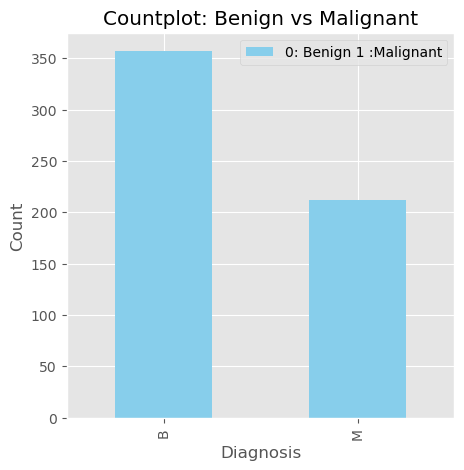

In [7]:
# Some visualization

plt.figure(figsize = (5, 5))
df['diagnosis'].value_counts().plot(kind = 'bar', color = 'skyblue', label ='0: Benign 1 :Malignant')
plt.title("Countplot: Benign vs Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend()
plt.show()

<AxesSubplot:>

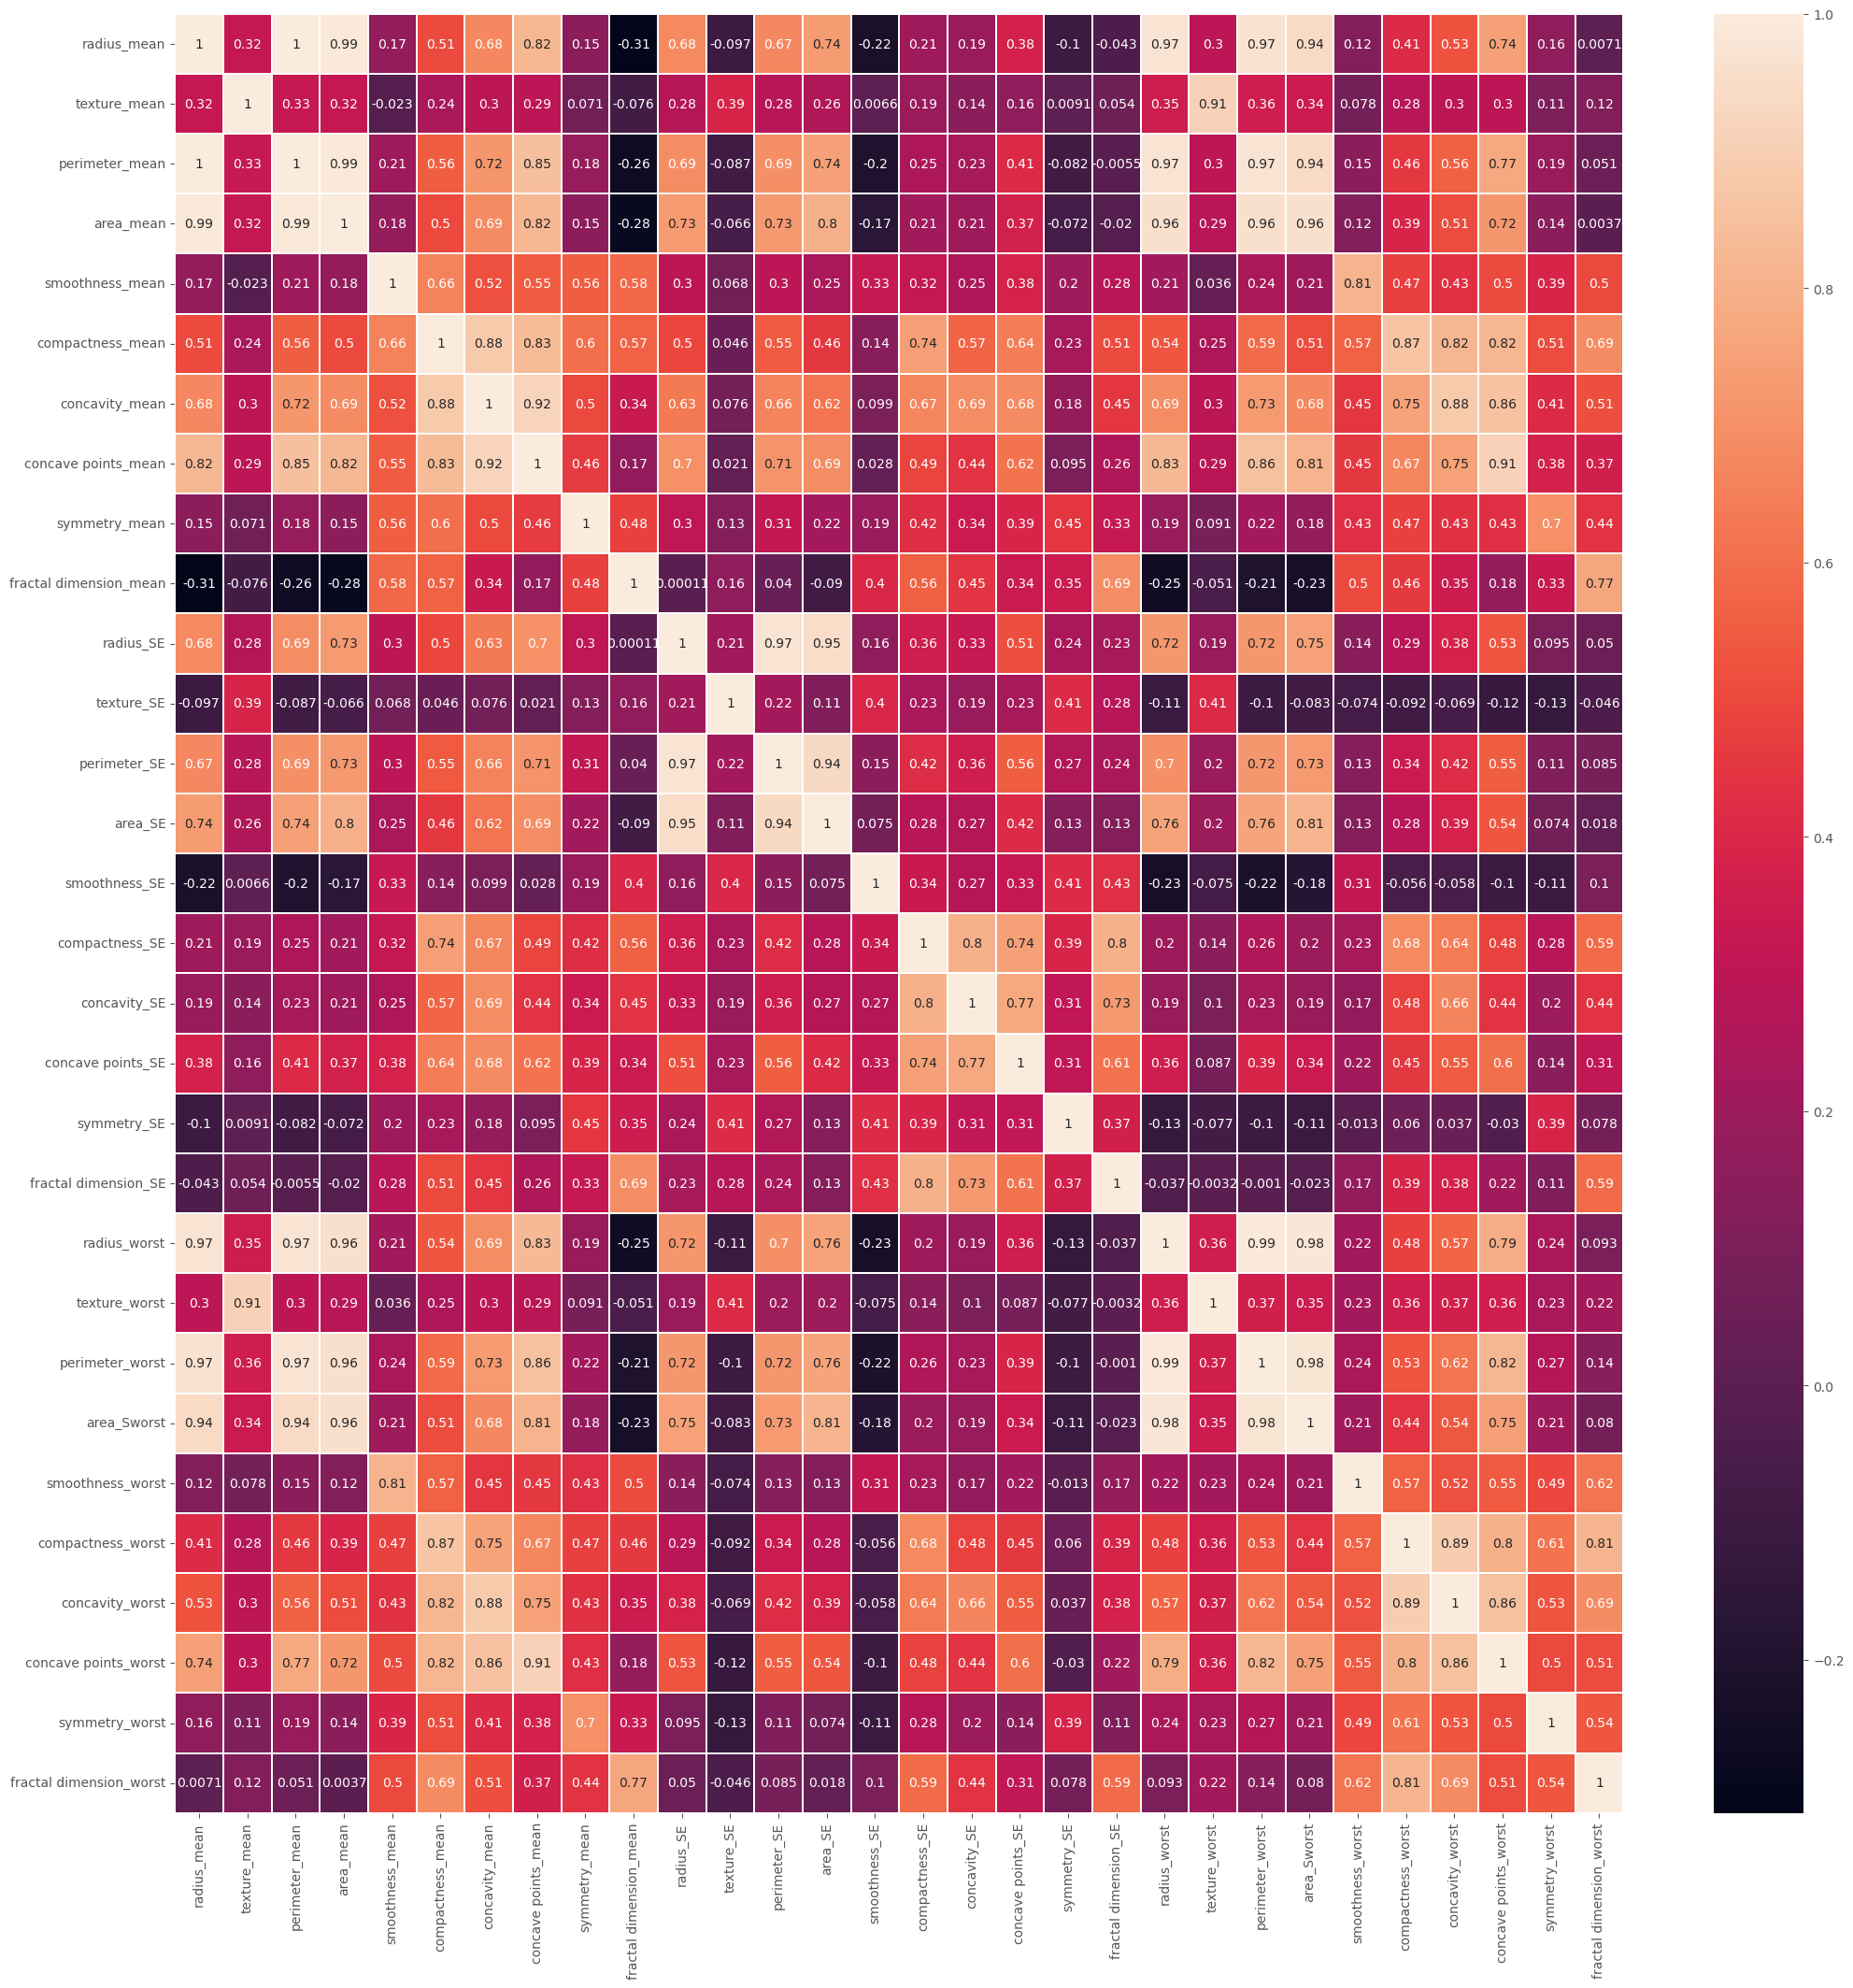

In [8]:
# Since there are 32 features, let check for multicollinearity
# Let us use heatmap function

plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), annot = True, linewidths = 0.20)

The highly corelated pairs are:  

 >texture_mean & texture_worst

 >area_mean & radius_worst

 >perimeter_mean and radius_worst

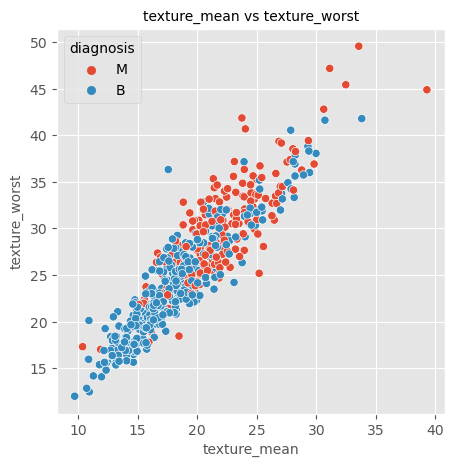

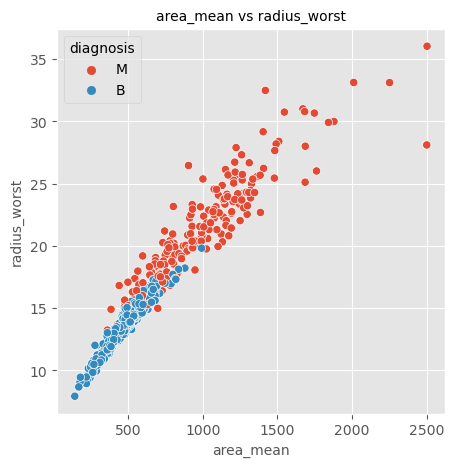

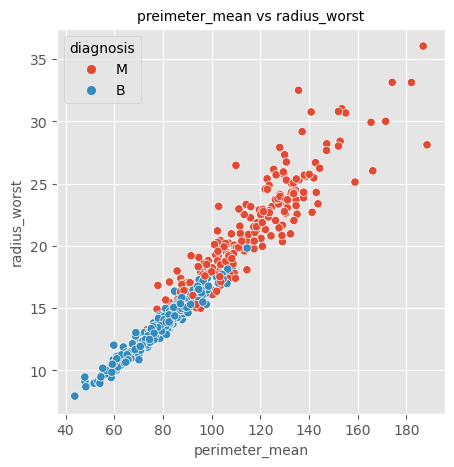

In [9]:
#Some more plots

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'texture_mean', y ='texture_worst', hue = 'diagnosis', data = df)
plt.xlabel('texture_mean', fontsize = 10)
plt.ylabel('texture_worst', fontsize = 10)
plt.title('texture_mean vs texture_worst', fontsize = 10)
plt.show()


plt.figure(figsize = (5,5))
sns.scatterplot(x = 'area_mean', y = 'radius_worst', hue = 'diagnosis', data = df)
plt.xlabel('area_mean', fontsize = 10)
plt.ylabel('radius_worst', fontsize = 10)
plt.title('area_mean vs radius_worst', fontsize = 10)
plt.show()

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'perimeter_mean', y = 'radius_worst', hue = 'diagnosis', data = df)
plt.xlabel('perimeter_mean', fontsize = 10)
plt.ylabel('radius_worst', fontsize = 10)
plt.title('preimeter_mean vs radius_worst', fontsize = 10)
plt.show()

In [10]:
# Encoding categorical data column "diagnosis"

encode = LabelEncoder()
df['diagnosis'] = encode.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_Sworst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#See the encoded column "diagnosis"

df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

### Data preparation

In [12]:
# Creating and splitting the dataset as features and target

x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [13]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_Sworst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [15]:
#Dividing data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [16]:
# Standardizing the data involes moving each datapoint to a distribution of mean = 0 and SD = 1

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

### Model Building

##### Logistic Regression

In [17]:
# Logistic Regression

logmodel = LogisticRegression()

In [18]:
logmodel.fit(x_train, y_train)
y_log_predict = logmodel.predict(x_test)

In [19]:
# y_log_predict
print('Accuracy : {}'.format(accuracy_score(y_test, y_log_predict)))
print("Confusion Matrix \n\n", confusion_matrix(y_test, y_log_predict, labels=[0, 1]))
print(classification_report(y_test, y_log_predict)) 

Accuracy : 0.9707602339181286
Confusion Matrix 

 [[107   1]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



##### KNN Classifier

In [20]:
# KNN Classifier

knnmodel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [21]:
knnmodel.fit(x_train, y_train)
y_knn_predict = knnmodel.predict(x_test)

In [22]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_knn_predict)))
print("Confusion Matrix \n\n", confusion_matrix(y_test, y_knn_predict, labels=[0, 1]))
print(classification_report(y_test, y_knn_predict))

Accuracy : 0.9590643274853801
Confusion Matrix 

 [[107   1]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



##### Randomn Forest

In [23]:
# Randomn Forest

rfmodel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [24]:
rfmodel.fit(x_train, y_train)
y_rfmodel_predict = rfmodel.predict(x_test)

In [25]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_rfmodel_predict)))
print("Confusion Matrix \n\n", confusion_matrix(y_test, y_rfmodel_predict, labels=[0, 1]))
print(classification_report(y_test, y_rfmodel_predict)) 

Accuracy : 0.9649122807017544
Confusion Matrix 

 [[107   1]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



##### Support Vector Machine

In [26]:
# Support Vector Machine

supmodel = SVC(probability = True)

In [27]:
supmodel.fit(x_train, y_train)
y_supmodel_predict = supmodel.predict(x_test)

In [28]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_supmodel_predict)))
print("Confusion Matrix \n\n", confusion_matrix(y_test, y_supmodel_predict, labels=[0, 1]))
print(classification_report(y_test, y_supmodel_predict)) 

Accuracy : 0.935672514619883
Confusion Matrix 

 [[108   0]
 [ 11  52]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



#### Here we see that out of our three models the best performing model is Logistic Regression.